# Drought Detection Modeling

## Begin Preprocessing Dataset

In [161]:
df

,Site Id,Date,PREC.I-1 (in),TOBS.I-1 (degC),TMAX.D-1 (degC),TMIN.D-1 (degC),TAVG.D-1 (degC),SMS.I-1:-2 (pct) (loam),SMS.I-1:-4 (pct) (loam),SMS.I-1:-8 (pct) (loam),...,SAL.I-5:-40 (gram),RDC.I-1:-2 (unit),RDC.I-1:-4 (unit),RDC.I-1:-8 (unit),RDC.I-1:-20 (unit),RDC.I-5:-40 (unit),BATT.I-1 (volt),BATT.I-2 (volt),WDIRV.D-1 (degr),WSPDV.D-1 (mph)
0,2027,2000-01-01,4.60,16.3,22.6,7.5,14.7,1.8,4.6,7.3,...,0.1,3.30,4.20,5.3,10.51,15.60,12.75,3.16,184.0,2.3
1,2027,2000-01-02,4.70,13.2,22.9,12.3,16.8,2.2,6.8,8.1,...,0.1,3.40,5.10,5.7,10.28,15.40,12.74,3.16,144.0,2.5
2,2027,2000-01-03,4.70,15.1,25.7,9.7,17.0,1.0,5.5,7.0,...,0.1,3.00,4.60,5.2,10.07,15.18,12.72,3.16,180.0,2.1
3,2027,2000-01-04,4.70,16.9,26.0,12.2,19.0,0.8,5.9,8.0,...,0.1,2.90,4.80,5.6,10.19,15.53,12.73,3.16,179.0,3.8
4,2027,2000-01-05,5.00,10.1,23.8,10.0,17.5,3.0,7.8,9.6,...,0.1,3.70,5.50,6.4,9.98,15.42,12.51,3.16,234.0,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,2027,2021-12-27,6.10,15.2,24.6,12.7,17.5,12.0,12.2,NaN,...,NaN,7.51,7.64,NaN,9.27,NaN,12.71,3.68,214.0,1.9
8053,2027,2021-12-28,6.10,17.6,22.6,13.6,18.2,12.0,12.1,NaN,...,NaN,7.52,7.58,NaN,9.16,NaN,12.70,3.68,233.0,1.9
8054,2027,2021-12-29,6.11,17.6,25.4,17.6,20.5,11.9,11.8,NaN,...,NaN,7.49,7.44,NaN,9.08,NaN,12.71,3.69,190.0,3.1
8055,2027,2021-12-30,6.18,21.7,25.1,15.6,20.5,12.4,11.8,NaN,...,NaN,7.73,7.41,NaN,9.00,NaN,12.70,3.68,178.0,2.8


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Site Id                    8057 non-null   int64  
 1   Date                       8057 non-null   object 
 2   PREC.I-1 (in)              7400 non-null   float64
 3   TOBS.I-1 (degC)            7939 non-null   float64
 4   TMAX.D-1 (degC)            7923 non-null   float64
 5   TMIN.D-1 (degC)            7919 non-null   float64
 6   TAVG.D-1 (degC)            7921 non-null   float64
 7   SMS.I-1:-2 (pct)  (loam)   7834 non-null   float64
 8   SMS.I-1:-4 (pct)  (loam)   7562 non-null   float64
 9   SMS.I-1:-8 (pct)  (loam)   7197 non-null   float64
 10  SMS.I-1:-20 (pct)  (loam)  7846 non-null   float64
 11  SMS.I-5:-40 (pct)  (loam)  7438 non-null   float64
 12  STO.I-1:-2 (degC)          7934 non-null   float64
 13  STO.I-1:-4 (degC)          7563 non-null   float

In [163]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Site Id,8057.0,2027.000000,0.000000,2027.00,2027.00,2027.00,2027.000,2027.00
PREC.I-1 (in),7400.0,19.710030,14.289009,-19.82,7.04,17.80,30.250,60.27
TOBS.I-1 (degC),7939.0,17.224310,7.171315,-5.00,12.00,18.90,23.300,30.60
TMAX.D-1 (degC),7923.0,25.818238,7.345559,-1.50,20.80,27.20,31.900,39.40
TMIN.D-1 (degC),7919.0,14.234108,7.766025,-40.00,8.10,15.50,21.500,26.10
TAVG.D-1 (degC),7921.0,19.608825,7.160591,-4.80,14.40,20.90,25.700,32.20
SMS.I-1:-2 (pct) (loam),7834.0,10.105514,4.237089,0.00,7.50,10.20,12.600,35.80
SMS.I-1:-4 (pct) (loam),7562.0,9.770246,3.387726,0.50,7.80,9.90,11.900,38.10
SMS.I-1:-8 (pct) (loam),7197.0,12.125233,6.015104,0.00,8.80,11.70,14.200,63.50
SMS.I-1:-20 (pct) (loam),7846.0,12.285139,3.189080,0.00,10.60,12.00,13.600,40.50


In [164]:
df.isin([0]).sum()

Site Id                         0
Date                            0
PREC.I-1 (in)                 127
TOBS.I-1 (degC)                 3
TMAX.D-1 (degC)                 0
TMIN.D-1 (degC)                14
TAVG.D-1 (degC)                 3
SMS.I-1:-2 (pct)  (loam)       43
SMS.I-1:-4 (pct)  (loam)        0
SMS.I-1:-8 (pct)  (loam)        3
SMS.I-1:-20 (pct)  (loam)       6
SMS.I-5:-40 (pct)  (loam)       0
STO.I-1:-2 (degC)               0
STO.I-1:-4 (degC)               0
STO.I-1:-8 (degC)               0
STO.I-1:-20 (degC)              0
STO.I-5:-40 (degC)              0
SAL.I-1:-2 (gram)            1917
SAL.I-1:-4 (gram)             935
SAL.I-1:-8 (gram)             435
SAL.I-1:-20 (gram)             13
SAL.I-5:-40 (gram)              0
RDC.I-1:-2 (unit)               0
RDC.I-1:-4 (unit)               0
RDC.I-1:-8 (unit)               4
RDC.I-1:-20 (unit)              0
RDC.I-5:-40 (unit)              0
BATT.I-1 (volt)                 0
BATT.I-2 (volt)                 0
WDIRV.D-1 (deg

### Inital Plots

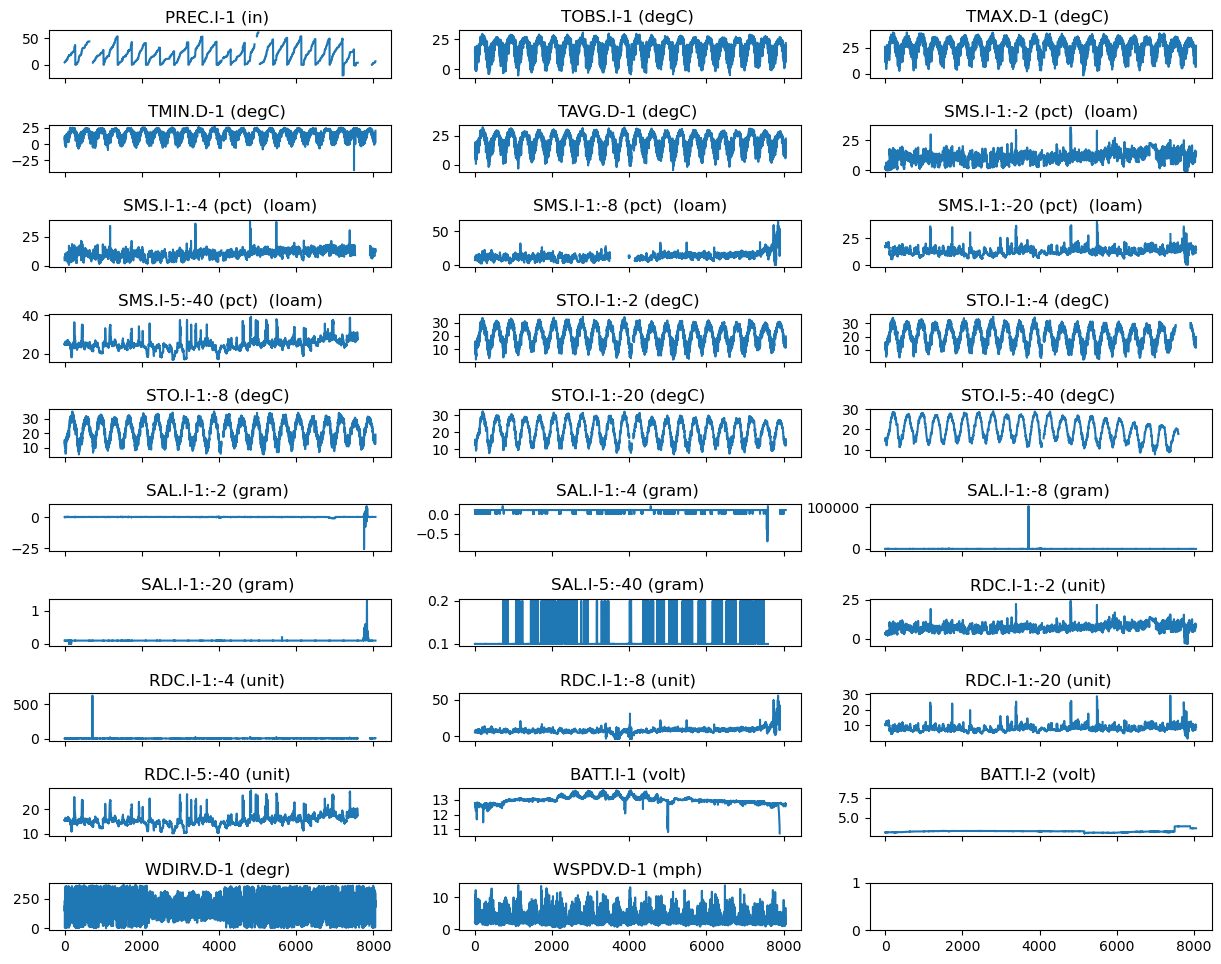

In [165]:
# Cols we want to plot
plot_cols = list(df.columns[2:])

# Subplot initialization
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15,30), sharex='all')
for col, ax in zip(plot_cols, axs.ravel()):
    df[col].plot(ax=ax)
    # chart formatting
    ax.set_title(col)
    ax.set_xlabel("")

plt.subplots_adjust(hspace=1.0, top=1.5, bottom=1.2)
plt.show()

### Missing Data Exploration

In [166]:
# Get an understanding on our nan data
df.isnull().sum(axis=1)
df.isnull().sum(axis=0)

Site Id                        0
Date                           0
PREC.I-1 (in)                657
TOBS.I-1 (degC)              118
TMAX.D-1 (degC)              134
TMIN.D-1 (degC)              138
TAVG.D-1 (degC)              136
SMS.I-1:-2 (pct)  (loam)     223
SMS.I-1:-4 (pct)  (loam)     495
SMS.I-1:-8 (pct)  (loam)     860
SMS.I-1:-20 (pct)  (loam)    211
SMS.I-5:-40 (pct)  (loam)    619
STO.I-1:-2 (degC)            123
STO.I-1:-4 (degC)            494
STO.I-1:-8 (degC)            124
STO.I-1:-20 (degC)           123
STO.I-5:-40 (degC)           564
SAL.I-1:-2 (gram)            123
SAL.I-1:-4 (gram)            424
SAL.I-1:-8 (gram)            127
SAL.I-1:-20 (gram)           123
SAL.I-5:-40 (gram)           564
RDC.I-1:-2 (unit)            123
RDC.I-1:-4 (unit)            424
RDC.I-1:-8 (unit)            267
RDC.I-1:-20 (unit)           123
RDC.I-5:-40 (unit)           564
BATT.I-1 (volt)              118
BATT.I-2 (volt)              130
WDIRV.D-1 (degr)             135
WSPDV.D-1 

<AxesSubplot:>

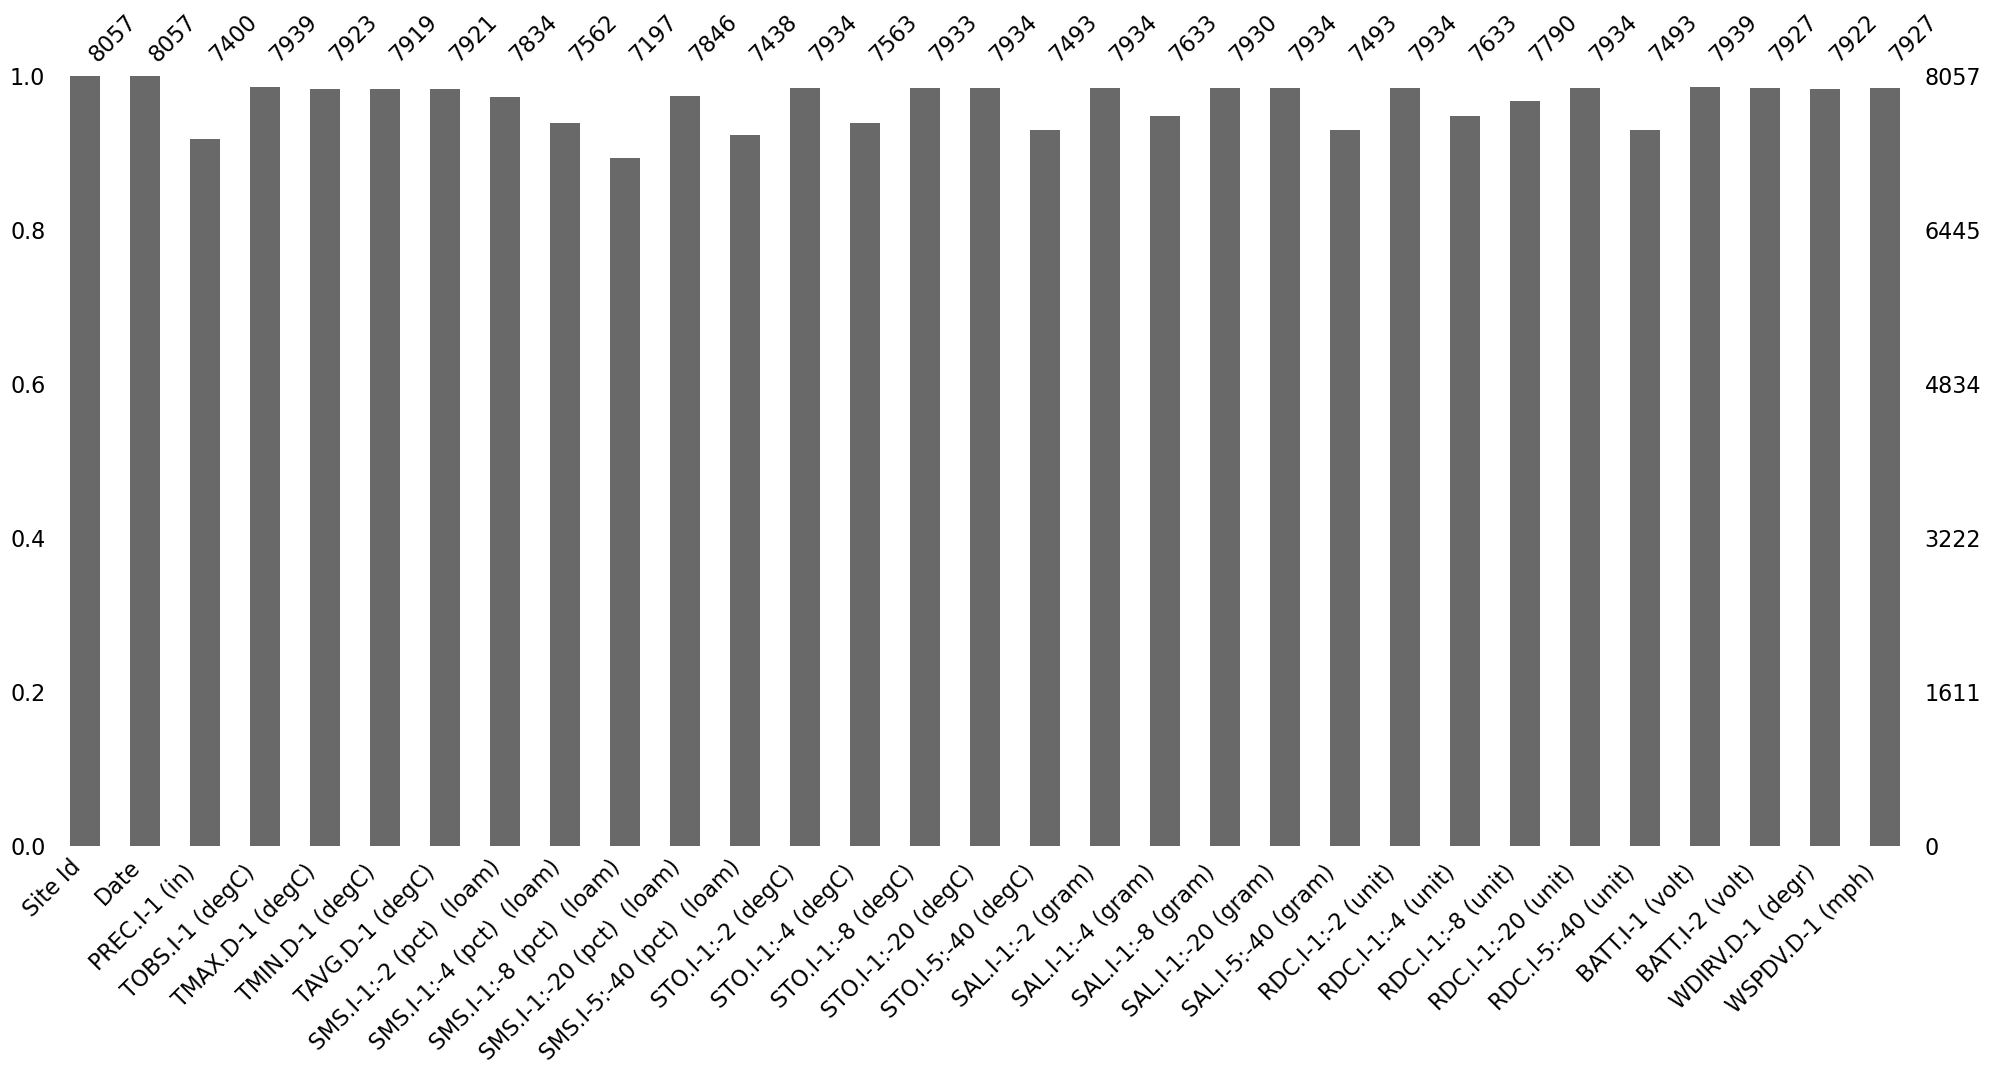

In [167]:
# Missing Data Barchart
msno.bar(df)

We can see that we have a few columns falling within 80% range of coverage

<AxesSubplot:>

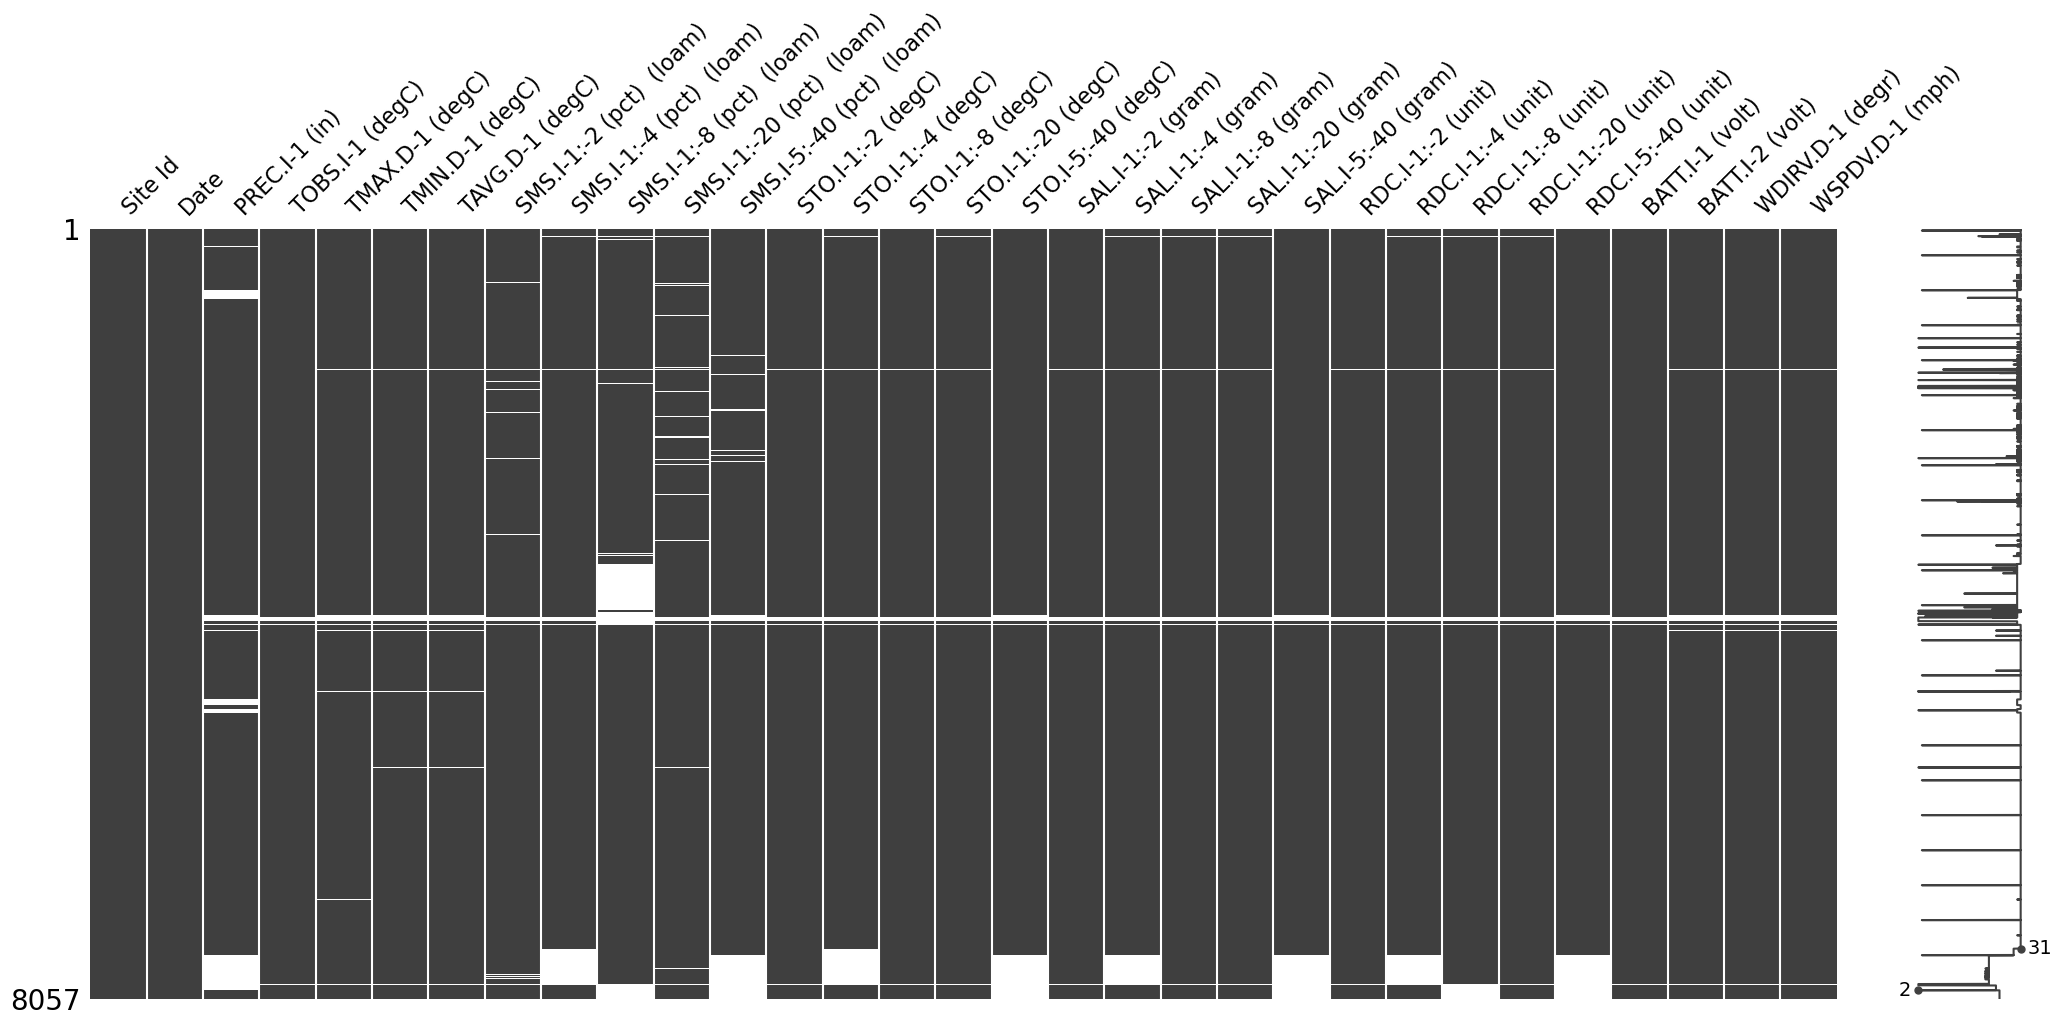

In [168]:
# Missing Data Matrix to visualize distribution of missing data
pre_missing_matrix = msno.matrix(df)
pre_missing_matrix

<AxesSubplot:>

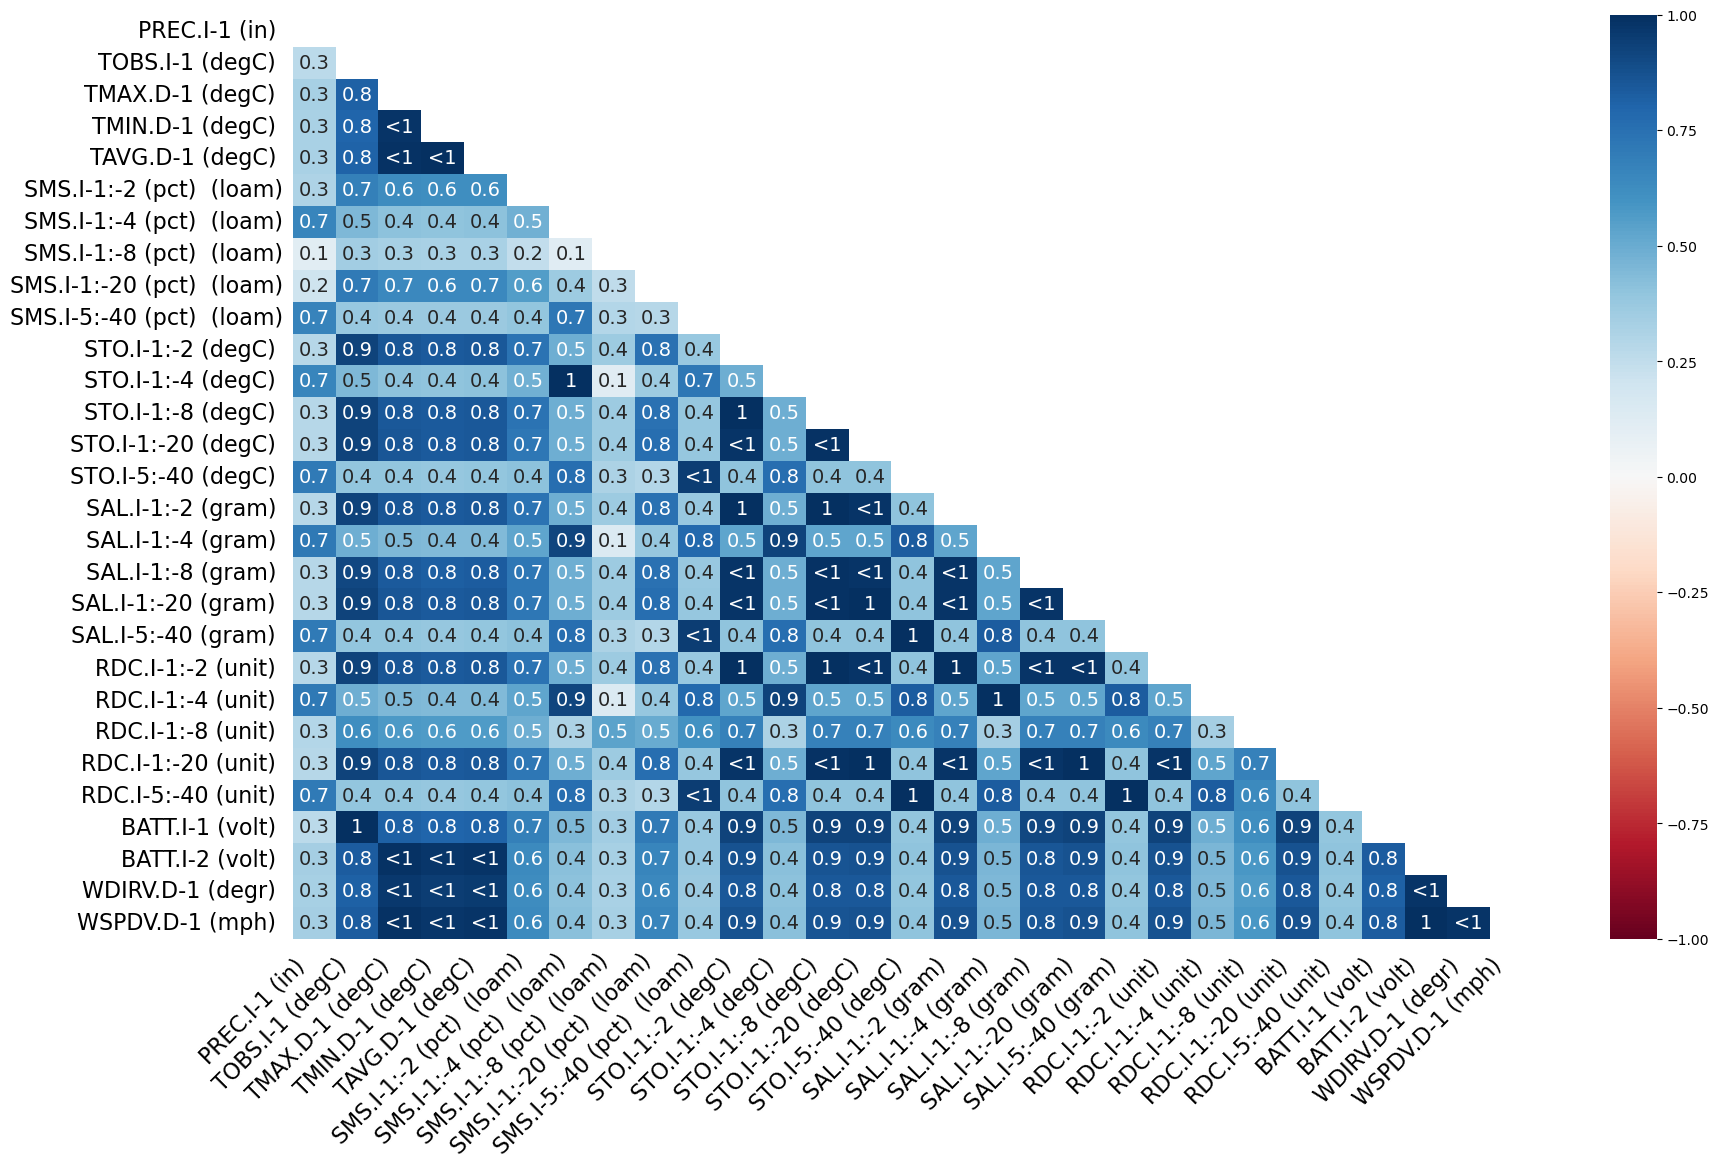

In [169]:
# Missing data heatmap to see if there is any correlation between missing values
pre_missing_heatmap = msno.heatmap(df)
pre_missing_heatmap


In [170]:
# Split DateTime Col
def make_date_cols(dFrame) :
    date_splits = [
    ('year', 0 , 4), ('month', 5, 7), ('day', 8,10)
    ]
    for i in date_splits:
        dFrame[i[0]] = [d[i[1]:i[2]] for d in dFrame['Date']]
    return dFrame

df = make_date_cols(df)

## Dealing with The missing Data

### Merging Duplicate Days

In [171]:
# Let's see how many rows we have per years we expect 365 except some leap years
df.year.value_counts()

2000    367
2012    367
2020    367
2004    367
2008    367
2019    366
2018    366
2017    366
2016    366
2015    366
2014    366
2013    366
2011    366
2001    366
2010    366
2009    366
2007    366
2006    366
2005    366
2003    366
2002    366
2021    366
Name: year, dtype: int64

In [172]:
# Collect what rows are duplicated on date
subset = df.loc[df.duplicated(subset=['Date'], keep=False), :]
print(f'Duplicated Days: {subset.shape[0]}')

Duplicated Days: 44


In [173]:
# Merge Duplicates
df = df.groupby('Date').mean().reset_index()
# Remove duplicates
df.drop_duplicates(subset=['Date'], inplace=True)

In [174]:
# Check our Counts again
df = make_date_cols(df)
df.year.value_counts()

2000    366
2012    366
2020    366
2004    366
2008    366
2019    365
2018    365
2017    365
2016    365
2015    365
2014    365
2013    365
2011    365
2001    365
2010    365
2009    365
2007    365
2006    365
2005    365
2003    365
2002    365
2021    365
Name: year, dtype: int64

In [175]:
df['Date'] = pd.to_datetime(df['Date'])

## Pipelining Outlier Removal & Nan Imputation
Using sklearn pipelines remove the outliers within the set then imputate nan values

In [176]:
def custom_labeler(dFrame):
    labels.drop([0], inplace=True)
    labels
    colsMap = {}
    def labelGen(label):
        row = labels.loc[labels['Label'] == label, :].iloc[0]
        temp = f'{row.Element} {row["Sensor Height"]} ({row.Unit})'
        temp = temp.replace('nan', '')
        return temp.strip()
    cols_string = ",".join(dFrame.columns[1:-3])
    replacements = ['(degC)','(pct)','(loam)','(gram)','(unit)','(volt)', '(degr)','(in)','(mph)']
    for i in replacements:
        cols_string = cols_string.replace(i, '')

    cols_list = [i.strip() for i in cols_string.split(',')]

    zipped_cols = dict(zip(list(dFrame.columns[1:-3]), cols_list))

    for i in list(labels.Label):
        colsMap[i] = labelGen(i)

    readable_df = dFrame.rename(columns=zipped_cols).rename(columns=colsMap)
    return readable_df

In [177]:
labeled_df = custom_labeler(df)

print('Values = 0\n')
print(labeled_df.isin([0]).sum())
print('\nValues = nan\n')
print(labeled_df.isnull().sum())

Values = 0

Date                                        0
Site Id                                     0
Precipitation Accumulation  (In)          127
Air Temperature Observed  (Degc)            3
Air Temperature Maximum  (Degc)             0
Air Temperature Minimum  (Degc)            14
Air Temperature Average  (Degc)             3
Soil Moisture Percent -2" (Pct)            43
Soil Moisture Percent -4" (Pct)             0
Soil Moisture Percent -8" (Pct)             3
Soil Moisture Percent -20" (Pct)            6
Soil Moisture Percent -40" (Pct)            0
Soil Temperature Observed -2" (Degc)        0
Soil Temperature Observed -4" (Degc)        0
Soil Temperature Observed -8" (Degc)        0
Soil Temperature Observed -20" (Degc)       0
Soil Temperature Observed -40" (Degc)       0
Salinity -2" (Gram)                      1917
Salinity -4" (Gram)                       935
Salinity -8" (Gram)                       435
Salinity -20" (Gram)                       13
Salinity -40" (Gram)  

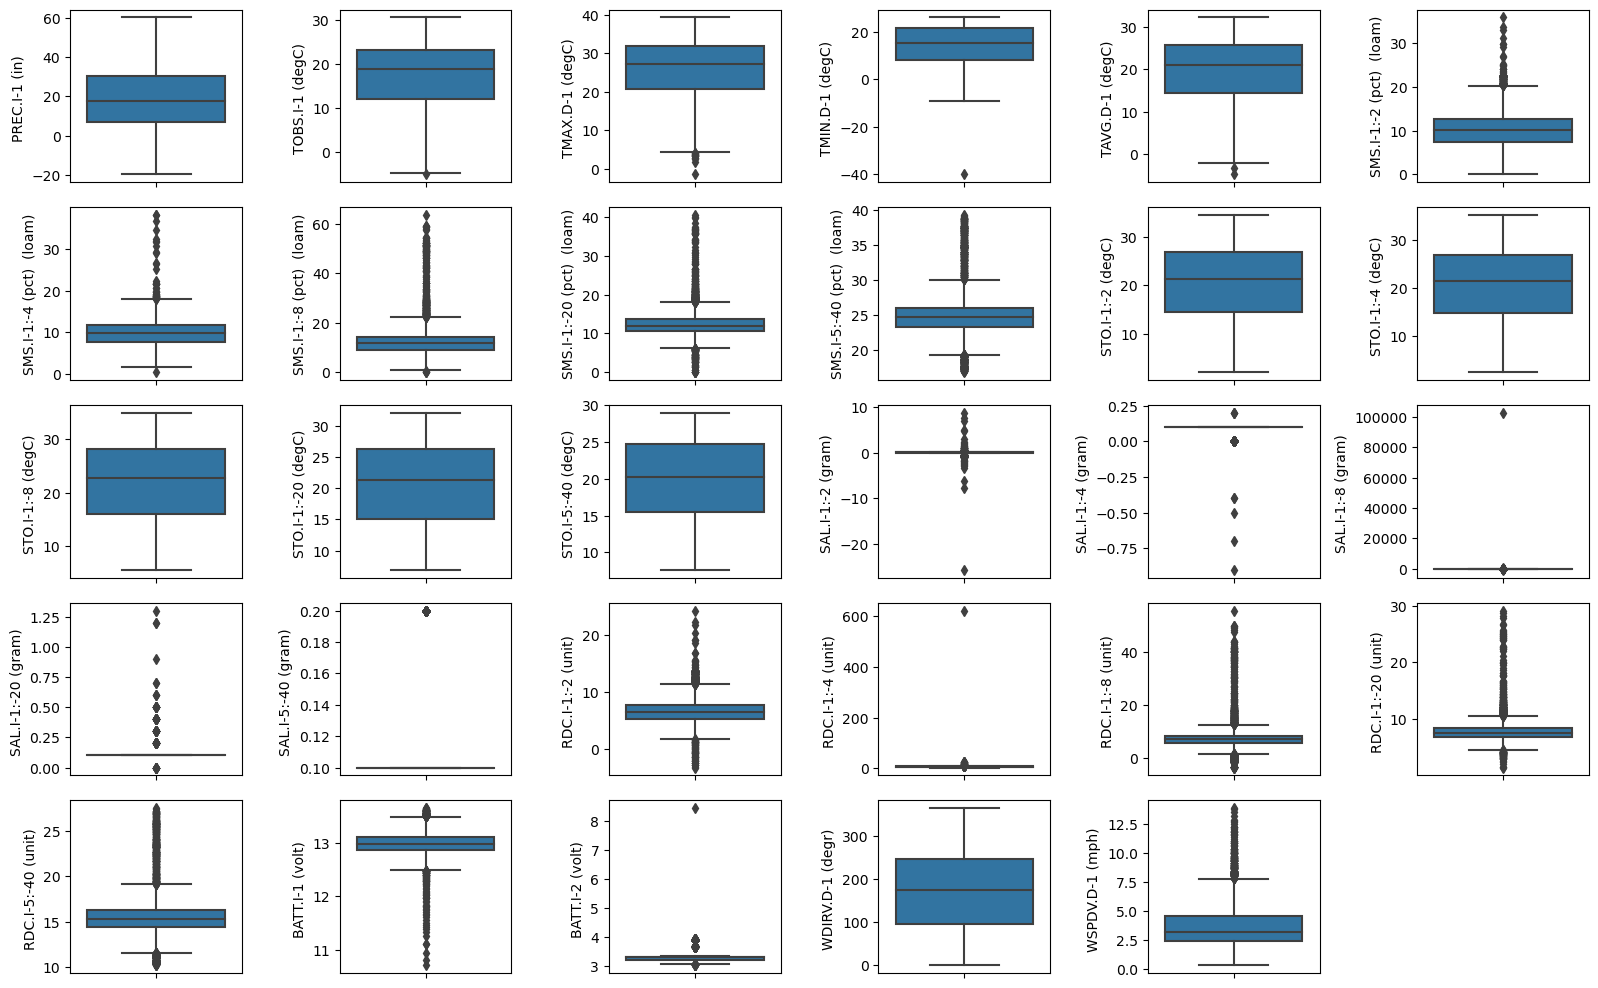

In [178]:
plt.figure(figsize=(16,10))
X = df.copy().drop(['Date' ,'Site Id', 'year','month',
                    'day'], axis=1)
features = X.columns.tolist()
for i,col in enumerate(features):
    plt.subplot(5,6,i + 1)
    sns.boxplot(y=col, data=df)
plt.tight_layout()
plt.show()

In [193]:
for x in features:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [198]:
df.isnull().sum(axis=0)

Date                           0
Site Id                        0
PREC.I-1 (in)                655
TOBS.I-1 (degC)               96
TMAX.D-1 (degC)              112
TMIN.D-1 (degC)              116
TAVG.D-1 (degC)              114
SMS.I-1:-2 (pct)  (loam)     201
SMS.I-1:-4 (pct)  (loam)     462
SMS.I-1:-8 (pct)  (loam)     838
SMS.I-1:-20 (pct)  (loam)    189
SMS.I-5:-40 (pct)  (loam)    597
STO.I-1:-2 (degC)            101
STO.I-1:-4 (degC)            461
STO.I-1:-8 (degC)            102
STO.I-1:-20 (degC)           101
STO.I-5:-40 (degC)           542
SAL.I-1:-2 (gram)            101
SAL.I-1:-4 (gram)            402
SAL.I-1:-8 (gram)            105
SAL.I-1:-20 (gram)           101
SAL.I-5:-40 (gram)           542
RDC.I-1:-2 (unit)            101
RDC.I-1:-4 (unit)            402
RDC.I-1:-8 (unit)            245
RDC.I-1:-20 (unit)           101
RDC.I-5:-40 (unit)           542
BATT.I-1 (volt)               96
BATT.I-2 (volt)              108
WDIRV.D-1 (degr)             113
WSPDV.D-1 

In [181]:
# Start Sklearn pipeline for filling NaN values


In [182]:
print(f'Null readings in Precipitation Accumulation: {df["PREC.I-1 (in) "].isna().sum(axis=0)}')

Null readings in Precipitation Accumulation: 655


<AxesSubplot:>

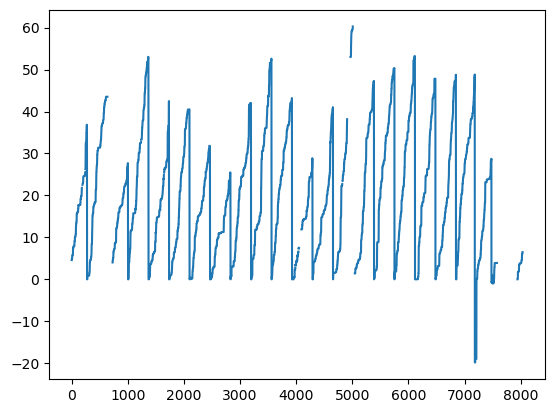

In [183]:
# Let's Plot it to see the missing gaps in data
df['PREC.I-1 (in) '].plot()

<AxesSubplot:>

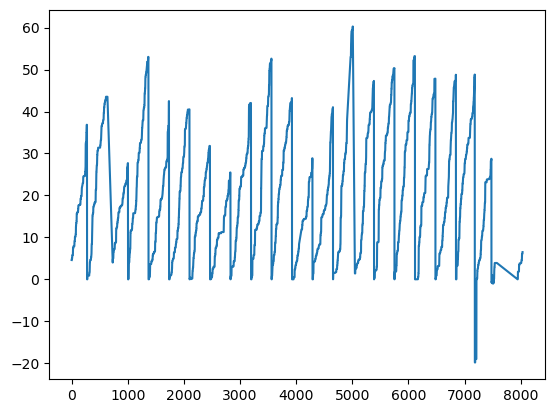

In [184]:
df['PREC.I-1 (in) '].dropna().plot()

In [185]:
df.drop(df[df['PREC.I-1 (in) '] < 0].index, inplace=True)

In [ ]:
test = df.interpolate(method='pad', limit=3)
test.dropna()

In [ ]:
df.year.value_counts()

In [ ]:
test.year.value_counts()

In [ ]:
for i in list(df.columns):
    plot = plt.figure(figsize=[22,2])
    plot = plt.plot(df[i])
    plot = plt.title(i)

plt.close()


In [ ]:
plt.close()

In [ ]:
df.describe().transpose()

In [ ]:
df.loc[df['SMS.I-1:-8 (pct)  (loam)'].isnull(), : ]

In [ ]:
labels = pd.read_csv('Data/header_descriptions.csv')

In [ ]:
labels

In [ ]:
list(df.columns)

In [ ]:
list(labels['Label'])

In [ ]:
labels.loc[labels['Label'] == 'TOBS.I-1', :].iloc[0]['Sensor Height']